In [42]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# Import raw cycling Data

In [16]:
trips_raw = pd.read_csv('trips_raw_data.csv')

C:\Users\aliqm\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (11,23) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Explore data types and rows in trips_raw_data.csv

In [17]:
trips_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8039088 entries, 0 to 8039087
Data columns (total 24 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Unnamed: 0           int64  
 1   Trip Id              int64  
 2   Subscription Id      float64
 3   Trip Duration        int64  
 4   Start Station Id     float64
 5   Start Time           object 
 6   Start Station Name   object 
 7   End Station Id       float64
 8   End Time             object 
 9   End Station Name     object 
 10  Bike Id              float64
 11  User Type            object 
 12  merge_time           object 
 13  Date/Time            object 
 14  Temp (°C)            float64
 15  Dew Point Temp (°C)  float64
 16  Rel Hum (%)          float64
 17  Wind Dir (10s deg)   float64
 18  Wind Spd (km/h)      float64
 19  Visibility (km)      float64
 20  Stn Press (kPa)      float64
 21  Hmdx                 float64
 22  Wind Chill           float64
 23  Weather              object 
dty

In [18]:
trips_raw.head()

,Unnamed: 0,Trip Id,Subscription Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,...,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Hmdx,Wind Chill,Weather
0,58,712441,NaN,274,7006.0,2017-01-01 00:03:00-05:00,Bay St / College St (East Side),7021.0,2017-01-01 00:08:00-05:00,Bay St / Albert St,...,1.5,-3.6,69.0,26.0,39.0,16.1,99.81,NaN,NaN,NaN
1,59,712442,NaN,538,7046.0,2017-01-01 00:03:00-05:00,Niagara St / Richmond St W,7147.0,2017-01-01 00:12:00-05:00,King St W / Fraser Ave,...,1.5,-3.6,69.0,26.0,39.0,16.1,99.81,NaN,NaN,NaN
2,60,712443,NaN,992,7048.0,2017-01-01 00:05:00-05:00,Front St W / Yonge St (Hockey Hall of Fame),7089.0,2017-01-01 00:22:00-05:00,Church St / Wood St,...,1.5,-3.6,69.0,26.0,39.0,16.1,99.81,NaN,NaN,NaN
3,61,712444,NaN,1005,7177.0,2017-01-01 00:09:00-05:00,East Liberty St / Pirandello St,7202.0,2017-01-01 00:26:00-05:00,Queen St W / York St (City Hall),...,1.5,-3.6,69.0,26.0,39.0,16.1,99.81,NaN,NaN,NaN
4,62,712445,NaN,645,7203.0,2017-01-01 00:14:00-05:00,Bathurst St/Queens Quay(Billy Bishop Airport),7010.0,2017-01-01 00:25:00-05:00,King St W / Spadina Ave,...,1.5,-3.6,69.0,26.0,39.0,16.1,99.81,NaN,NaN,NaN


# Cleaning Data

Removing all row except Trip ID, Trip Duration, Start Time and User Type

In [19]:
trips_raw = trips_raw[['Trip Id', 'Trip Duration', 'Start Time', 'User Type']]

Converting Start Time Column to a datetime format

In [20]:
trips_raw ['Start Time'] = pd.DatetimeIndex(trips_raw ['Start Time'])

Analyzing how many different user types there are 

In [21]:
unique_subscriptions = trips_raw['User Type'].unique()
unique_subscriptions

array([nan, 'Annual Member', 'Casual Member'], dtype=object)

Removing all nan from the User Type columns

In [22]:
trips_raw = trips_raw[~trips_raw['User Type'].isna()]

Determinging the time range for the data

In [23]:
min_date = trips_raw['Start Time'].min()
max_date = trips_raw['Start Time'].max()
print(min_date)
print(max_date)

2018-01-01 00:47:00-05:00
2020-12-10 23:59:00-05:00


Looks like before 2018-01-01, user types were not tracked. Also, last 21 days of December 2020 are missing from the data set. Free ride Wednesdays are only during September. Only keep data from September of each year

In [24]:
trips_raw = trips_raw[trips_raw['Start Time'].dt.month!=12]

Split data set into casual and annual users

In [97]:
casual_user = trips_raw[trips_raw['User Type'] == 'Casual Member']
annual_user = trips_raw[trips_raw['User Type'] == 'Annual Member']

Adding column to dataframe to indicate the year, month, week, weekday and hour the trip took place

In [224]:
casual_user['Year'] = casual_user['Start Time'].dt.year
annual_user['Year'] = annual_user['Start Time'].dt.year
casual_user['Month'] = casual_user['Start Time'].dt.month
annual_user['Month'] = annual_user['Start Time'].dt.month
casual_user['Week'] = casual_user['Start Time'].dt.week
annual_user['Week'] = annual_user['Start Time'].dt.week
casual_user['Weekday'] = casual_user['Start Time'].dt.weekday
annual_user['Weekday'] = annual_user['Start Time'].dt.weekday
casual_user['Day'] = casual_user['Start Time'].dt.day
annual_user['Day'] = annual_user['Start Time'].dt.day
casual_user['Hour'] = casual_user['Start Time'].dt.hour
annual_user['Hour'] = annual_user['Start Time'].dt.hour

<ipython-input-224-774b803ff4b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  casual_user['Year'] = casual_user['Start Time'].dt.year
<ipython-input-224-774b803ff4b1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  annual_user['Year'] = annual_user['Start Time'].dt.year
<ipython-input-224-774b803ff4b1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

In [225]:
casual_user.head()

,Trip Id,Trip Duration,Start Time,User Type,Year,Month,Week,Day,Hour,Weekday
1392046,2383664,797,2018-01-01 02:25:00-05:00,Casual Member,2018,1,1,1,2,0
1392060,2383678,1216,2018-01-01 03:46:00-05:00,Casual Member,2018,1,1,1,3,0
1392127,2383803,339,2018-01-01 12:53:00-05:00,Casual Member,2018,1,1,1,12,0
1392161,2383864,1318,2018-01-01 14:57:00-05:00,Casual Member,2018,1,1,1,14,0
1392162,2383865,1293,2018-01-01 14:57:00-05:00,Casual Member,2018,1,1,1,14,0


In [226]:
annual_user.head()

,Trip Id,Trip Duration,Start Time,User Type,Year,Month,Week,Day,Hour,Weekday
1392031,2383648,393,2018-01-01 00:47:00-05:00,Annual Member,2018,1,1,1,0,0
1392032,2383649,625,2018-01-01 00:52:00-05:00,Annual Member,2018,1,1,1,0,0
1392033,2383650,233,2018-01-01 00:55:00-05:00,Annual Member,2018,1,1,1,0,0
1392034,2383651,1138,2018-01-01 00:57:00-05:00,Annual Member,2018,1,1,1,0,0
1392035,2383652,703,2018-01-01 01:00:00-05:00,Annual Member,2018,1,1,1,1,0


# Plotting Data (weekly distribution over the year)

Grouping data by week over 2018 to 2020. Dividing by 3 to get average number of trips for that week of the year. 

In [227]:
number_casual_users_month = (casual_user.groupby(['Month']).size())/3
number_annual_users_month = (annual_user.groupby(['Month']).size())/3

Plotting weekly distribution (average week over the 3 years)

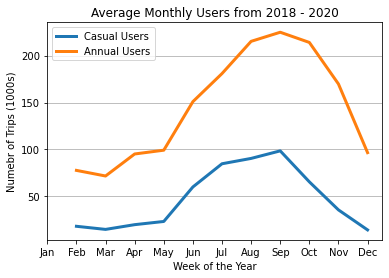

In [228]:
fig, ax = plt.subplots()

p1 = ax.plot(number_casual_users_month/1000,  linewidth = 3)
p2 = ax.plot(number_annual_users_month/1000,  linewidth = 3)

ax.yaxis.grid(True)
ax.xaxis.grid(False)

Months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec',]

plt.xticks(range(12), Months)

ax.set_ylabel('Numebr of Trips (1000s)')
ax.set_xlabel('Week of the Year')
ax.set_title('Average Monthly Users from 2018 - 2020')

ax.legend((p1[0],p2[0]), ('Casual Users','Annual Users'), 
          loc='best')

# Plotting Data (daily distribution over the week)

Grouping daily data over the 7 days of the week

In [229]:
number_casual_users_day = (casual_user.groupby(['Weekday']).size())/3
number_annual_users_day = (annual_user.groupby(['Weekday']).size())/3

Plotting daily distribution over the week (average day over the 3 years)

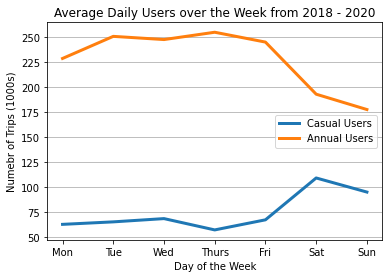

In [230]:
fig, ax = plt.subplots()

p1 = ax.plot(number_casual_users_day/1000,  linewidth = 3)
p2 = ax.plot(number_annual_users_day/1000,  linewidth = 3)

ax.yaxis.grid(True)
ax.xaxis.grid(False)

Weekdays = ['Mon', 'Tue', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']

plt.xticks(range(7), Weekdays)

ax.set_ylabel('Numebr of Trips (1000s)')
ax.set_xlabel('Day of the Week')
ax.set_title('Average Daily Users over the Week from 2018 - 2020')

ax.legend((p1[0],p2[0]), ('Casual Users','Annual Users'), 
          loc='best')

# Plotting Data (daily distribution over the week)

Grouping hourly data over the day

In [231]:
number_casual_users_Hour = (casual_user.groupby(['Hour']).size())/3
number_annual_users_Hour = (annual_user.groupby(['Hour']).size())/3

Plotting hourly distribution over the day (average day over the 3 years)

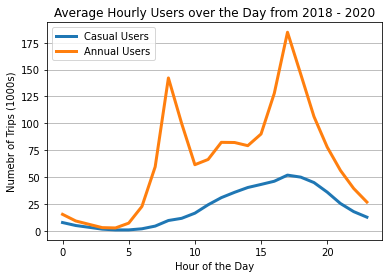

In [232]:
fig, ax = plt.subplots()

p1 = ax.plot(number_casual_users_Hour/1000,  linewidth = 3)
p2 = ax.plot(number_annual_users_Hour/1000,  linewidth = 3)

ax.yaxis.grid(True)
ax.xaxis.grid(False)


ax.set_ylabel('Numebr of Trips (1000s)')
ax.set_xlabel('Hour of the Day')
ax.set_title('Average Hourly Users over the Day from 2018 - 2020')

ax.legend((p1[0],p2[0]), ('Casual Users','Annual Users'), 
          loc='best')

# Plotting Holiday Statutory Holidays Impact Demand

Since most of the cycling demand is in the summner months only holidays in May, June, July and August will be analyzied. Additionally, we will only be looking at holidays in 2019. 

In [233]:
# Remove all years except 2019
casual_users_may_to_aug_2019 = casual_user[casual_user['Year']==2019]
annual_users_may_to_aug_2019 = annual_user[annual_user['Year']==2019]

# Remove all months except May
casual_users_may_2019 = casual_users_may_to_aug_2019[casual_users_may_to_aug_2019['Month'] == 5]
annual_users_may_2019 = annual_users_may_to_aug_2019[annual_users_may_to_aug_2019['Month'] == 5]

# Remove all months except June
casual_users_jun_2019 = casual_users_may_to_aug_2019[casual_users_may_to_aug_2019['Month'] == 6]
annual_users_jun_2019 = annual_users_may_to_aug_2019[annual_users_may_to_aug_2019['Month'] == 6]

# Remove all months except July
casual_users_jul_2019 = casual_users_may_to_aug_2019[casual_users_may_to_aug_2019['Month'] == 7]
annual_users_jul_2019 = annual_users_may_to_aug_2019[annual_users_may_to_aug_2019['Month'] == 7]

# Remove all months except Aug
casual_users_aug_2019 = casual_users_may_to_aug_2019[casual_users_may_to_aug_2019['Month'] == 8]
annual_users_aug_2019 = annual_users_may_to_aug_2019[annual_users_may_to_aug_2019['Month'] == 8]


### Holiday Demand in May 2019

In [248]:
number_casual_users_day = casual_users_may_2019.groupby(['Day']).size()
number_annual_users_day = annual_users_may_2019.groupby(['Day']).size()

Plotting daily data over May

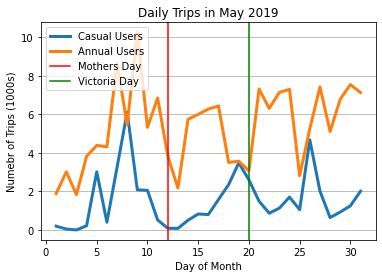

In [249]:
fig, ax = plt.subplots()

p1 = ax.plot(number_casual_users_day/1000,  linewidth = 3)
p2 = ax.plot(number_annual_users_day/1000,  linewidth = 3)

mohters_day = plt.axvline(x = 12, color = 'red')
vitoria_day = plt.axvline(x = 20, color = 'green')

ax.yaxis.grid(True)
ax.xaxis.grid(False)


ax.set_ylabel('Numebr of Trips (1000s)')
ax.set_xlabel('Day of Month')
ax.set_title('Daily Trips in May 2019')

ax.legend((p1[0],p2[0], mohters_day, vitoria_day), ('Casual Users','Annual Users', 'Mothers Day', 'Victoria Day'), 
          loc='best')

### Holiday Demand in June 2019

Grouping daily data over June

In [250]:
number_casual_users_day = casual_users_jun_2019.groupby(['Day']).size()
number_annual_users_day = annual_users_jun_2019.groupby(['Day']).size()

Plotting daily data over June

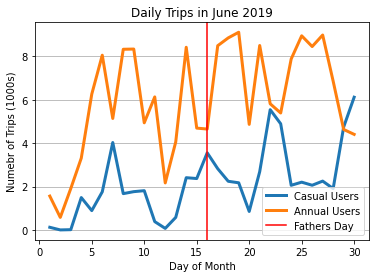

In [251]:
fig, ax = plt.subplots()

p1 = ax.plot(number_casual_users_day/1000,  linewidth = 3)
p2 = ax.plot(number_annual_users_day/1000,  linewidth = 3)

fathers_day = plt.axvline(x = 16, color = 'red')


ax.yaxis.grid(True)
ax.xaxis.grid(False)


ax.set_ylabel('Numebr of Trips (1000s)')
ax.set_xlabel('Day of Month')
ax.set_title('Daily Trips in June 2019')

ax.legend((p1[0],p2[0], fathers_day), ('Casual Users','Annual Users', 'Fathers Day'), 
          loc='best')

### Holiday Demand in July 2019

Grouping daily data over July

In [252]:
number_casual_users_day = casual_users_jul_2019.groupby(['Day']).size()
number_annual_users_day = annual_users_jul_2019.groupby(['Day']).size()

Plotting daily data over July

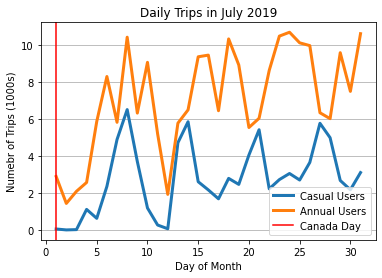

In [253]:
fig, ax = plt.subplots()

p1 = ax.plot(number_casual_users_day/1000,  linewidth = 3)
p2 = ax.plot(number_annual_users_day/1000,  linewidth = 3)

canada_day = plt.axvline(x = 1, color = 'red')


ax.yaxis.grid(True)
ax.xaxis.grid(False)


ax.set_ylabel('Numebr of Trips (1000s)')
ax.set_xlabel('Day of Month')
ax.set_title('Daily Trips in July 2019')

ax.legend((p1[0],p2[0], canada_day), ('Casual Users','Annual Users', 'Canada Day'), 
          loc='best')

# There are no statutory holidays in August